In [17]:
%matplotlib inline

from IPython.display import clear_output

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 

import numpy as np

from numpy import log, dot, e
from numpy.random import rand

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import logging
import pickle

### Get Dataset

In [19]:
# get bag of words
train = pd.read_csv("Dataset/BOW/train_bow.csv", header = None)

In [20]:
# get labels
dataset = pd.read_csv('Dataset/train.csv')[['text', 'label']]
dataset.dropna(inplace = True)
dataset.reset_index(drop = True, inplace = True)
trainLabel = dataset['label'].head(5000).values

In [21]:
print(train.shape)

(5000, 63028)


In [22]:
print(trainLabel.shape)

(5000,)


In [23]:
xTrain, xTest, yTrain, yTest = train_test_split(train, trainLabel, test_size = 0.2, random_state = 0)

## Logistic Regression Model

In [37]:
class LogisticRegression:
    def __init__(self, lr=0.05, epochs=100, intercept=True):
        self.lr = lr
        self.epochs = epochs
        self.intercept = intercept
    
    def addIntercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.intercept:
            X = self.addIntercept(X)
        
        self.loss = []
        
        # weights initialization
        self.weight = np.zeros(X.shape[1])
        
        for i in range(self.epochs):
            z = np.dot(X, self.weight)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.weight -= self.lr * gradient
            
            self.loss.append(self.cost(h, y))
            
            clear_output(wait=True)
            print(f'loss: {self.loss[i]} \t')
    
    def predict_prob(self, X):
        if self.intercept:
            X = self.addIntercept(X)
    
        return self.sigmoid(np.dot(X, self.weight))
    
    def predict(self, X):
        return self.predict_prob(X) >= 0.5

In [38]:
lrModel = LogisticRegression(lr=0.05, epochs=10000)

In [39]:
%time lrModel.fit(xTrain, yTrain)

loss: 0.022453609102931302 	
Wall time: 45min 33s


### Evaluation

In [42]:
predTest = lrModel.predict(xTest)
print((predTest == yTest).mean()*100)

95.6


In [41]:
trainPred = lrModel.predict(xTrain)
print((trainPred == yTrain).mean() * 100)

99.825


Text(0.5, 0, 'Epochs')

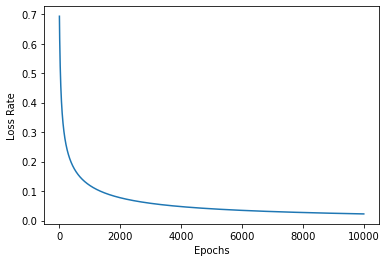

In [43]:
plt.plot([i for i in range(len(lrModel.loss))],lrModel.loss)
plt.ylabel("Loss Rate")
plt.xlabel("Epochs")id

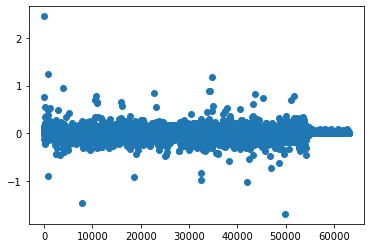

In [44]:
plt.scatter([i for i in range(len(lrModel.weight))], lrModel.weight)

Text(0.5, 1.0, 'Confusion Matrix, Logistic Regression')

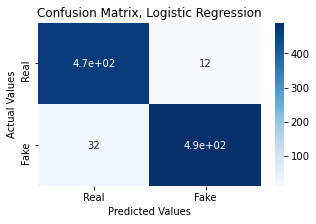

In [45]:
cm = confusion_matrix(yTest, predTest)

plt.figure(figsize = (5,3))
sn.heatmap(data = cm, annot = True, cmap = "Blues", xticklabels = ['Real', 'Fake'], yticklabels = ['Real', 'Fake'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix, Logistic Regression')

### Save Model

In [47]:
pickle.dump(lrModel, open("Model.pkl", "wb"))